## Importing libraries

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Dataset

In [37]:
df=pd.read_csv('twitter_validation.csv')
print(df)

       No                  App        Type  \
0    3364             Facebook  Irrelevant   
1     352               Amazon     Neutral   
2    8312            Microsoft    Negative   
3    4371                CS-GO    Negative   
4    4433               Google     Neutral   
..    ...                  ...         ...   
995  4891  GrandTheftAuto(GTA)  Irrelevant   
996  4359                CS-GO  Irrelevant   
997  2652          Borderlands    Positive   
998  8069            Microsoft    Positive   
999  6960      johnson&johnson     Neutral   

                                                 Tweet  Unnamed: 4  \
0    I mentioned on Facebook that I was struggling ...         NaN   
1    BBC News - Amazon boss Jeff Bezos rejects clai...         NaN   
2    @Microsoft Why do I pay for WORD when it funct...         NaN   
3    CSGO matchmaking is so full of closet hacking,...         NaN   
4    Now the President is slapping Americans in the...         NaN   
..                         

## Finding Path

In [17]:
import os
print(os.getcwd())


C:\Users\reeth


In [38]:
from textblob import TextBlob

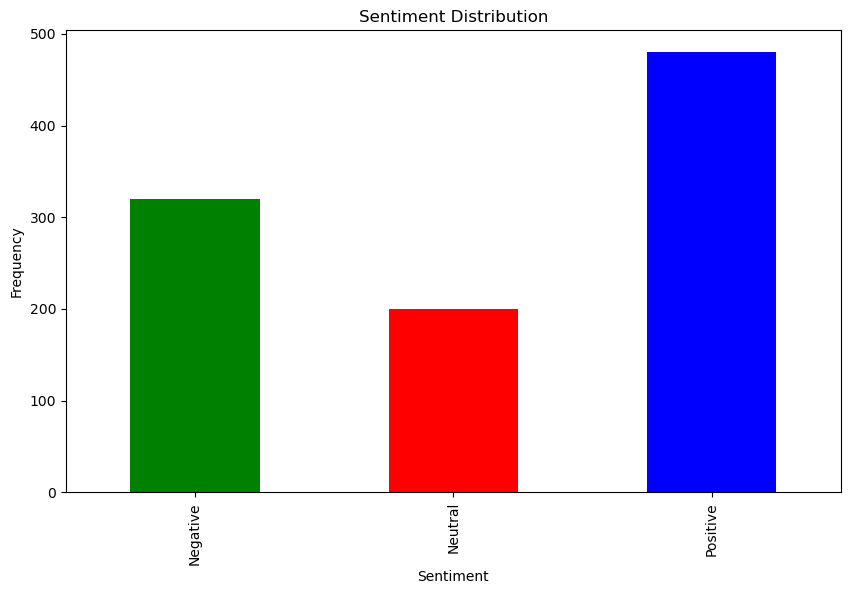

In [39]:
df['Sentiment_Polarity'] = df['Tweet'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['Sentiment'] = df['Sentiment_Polarity'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral')
plt.figure(figsize=(10, 6))
df['Sentiment'].value_counts().sort_index().plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()


## Sentiment Distribution


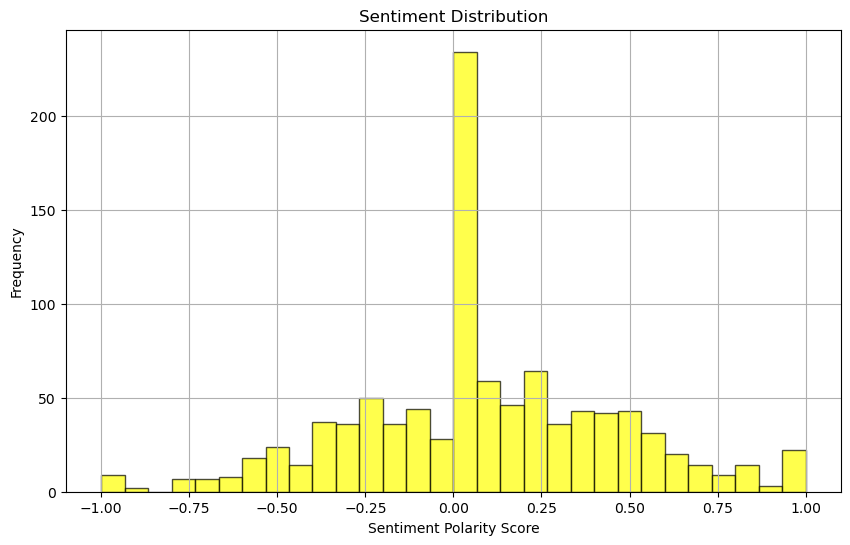

In [48]:
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity
df['Sentiment'] = df['Tweet'].apply(get_sentiment)
plt.figure(figsize=(10, 6))
df['Sentiment'].hist(bins=30, color='yellow', edgecolor='black', alpha=0.7)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Polarity Score')
plt.ylabel('Frequency')
plt.show()



## Sentiment Distribution for all apps 

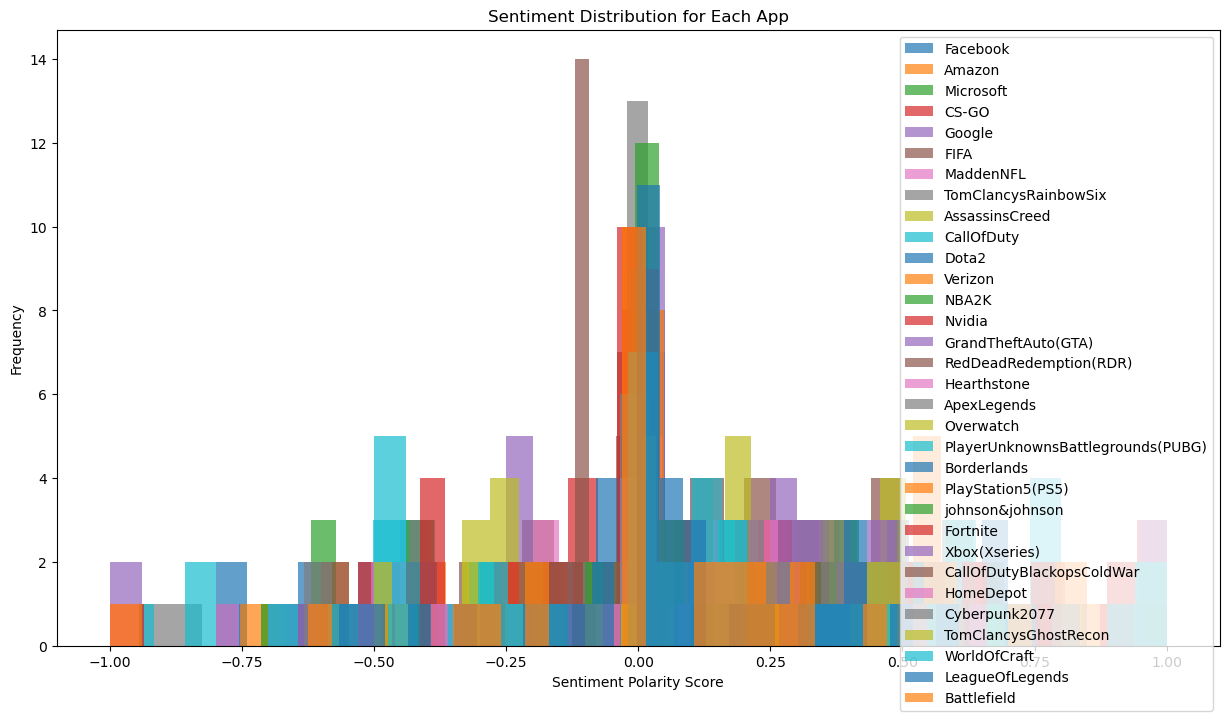

In [44]:
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity
df['Sentiment'] = df['Tweet'].apply(get_sentiment)
unique_apps = df['App'].unique()
plt.figure(figsize=(15, 8))
for app in unique_apps:
    app_df = df[df['App'] == app]
    plt.hist(app_df['Sentiment'], bins=30, alpha=0.7, label=app)

plt.title('Sentiment Distribution for Each App')
plt.xlabel('Sentiment Polarity Score')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

## Sentiment Distribution for all apps in different plots

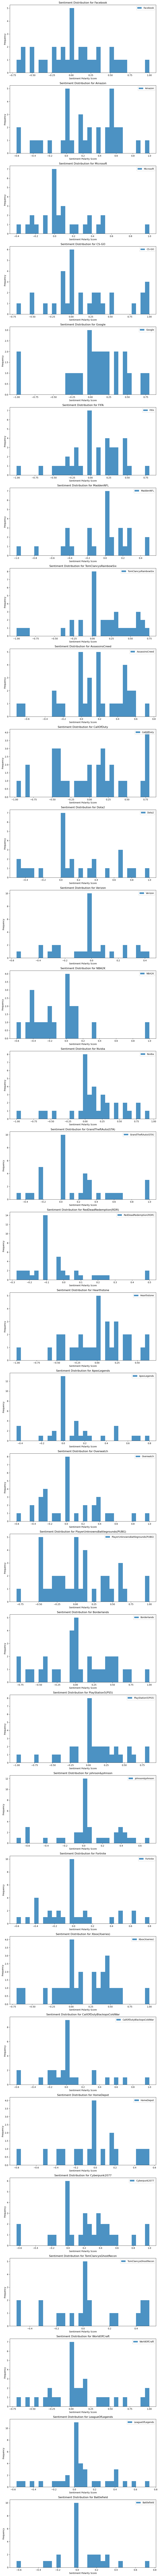

In [47]:
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity
df['Sentiment'] = df['Tweet'].apply(get_sentiment)
unique_apps = df['App'].unique()
fig, axes = plt.subplots(nrows=len(unique_apps), figsize=(10, 5 * len(unique_apps)))
for i, app in enumerate(unique_apps):
    app_df = df[df['App'] == app]
    axes[i].hist(app_df['Sentiment'], bins=30, alpha=0.8, label=app)
    axes[i].set_title(f'Sentiment Distribution for {app}')
    axes[i].set_xlabel('Sentiment Polarity Score')
    axes[i].set_ylabel('Frequency')
    axes[i].legend(loc='upper right')

plt.tight_layout()
plt.show()